<a href="https://colab.research.google.com/github/glwat/Durham_Masters/blob/main/Master's_Variable_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

In [ ]:
# Code Block 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Excel File

In [ ]:
# Code Block 5: Correctly load an Excel file and inspect structure

import pandas as pd

# File path variable (update this to your actual file)
file_path = "/content/drive/MyDrive/Masters_Colab_Data/Rockfall_Data_2021_Clean.xlsx"

# Load the dataset (Excel)
df = pd.read_excel(file_path)

# Display dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11407 entries, 0 to 11406
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTime              11407 non-null  datetime64[ns]
 1   ID                    11407 non-null  int64         
 2   Rockfall_Volume       11407 non-null  float64       
 3   Volume_Error          4105 non-null   float64       
 4   Rockfall_Event_Count  11407 non-null  int64         
 5   Total_Rainfall        11406 non-null  float64       
 6   Air_Temp              11407 non-null  float64       
 7   Relative_Humidity     11407 non-null  float64       
 8   Hourly_Rainfall       11105 non-null  float64       
 9   Time_Sin              11407 non-null  float64       
 10  Time_Cos              11407 non-null  float64       
 11  Date_Sin              11407 non-null  float64       
 12  Date_Cos              11407 non-null  float64       
dtypes: datetime64[ns

In [ ]:
# Code Block 7: Missing values per variable + total number of observations

# Total number of observations (rows)
total_obs = len(df)

# Missing values per column
missing_counts = df.isna().sum()

print(f"Total number of observations: {total_obs}\n")
print("Missing observations per variable:\n")

for col, count in missing_counts.items():
    print(f"{col}: {count}")

Total number of observations: 11407

Missing observations per variable:

DateTime: 0
ID: 0
Rockfall_Volume: 0
Volume_Error: 7302
Rockfall_Event_Count: 0
Total_Rainfall: 1
Air_Temp: 0
Relative_Humidity: 0
Hourly_Rainfall: 302
Time_Sin: 0
Time_Cos: 0
Date_Sin: 0
Date_Cos: 0


Aggregating Identical DateTime Values

In [ ]:
# Code Block 8: Count unique DateTime values

# Ensure the DateTime column is parsed as datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Count unique datetime entries
unique_dt_count = df['DateTime'].nunique()

print(f"Number of unique DateTime values: {unique_dt_count}")

Number of unique DateTime values: 8377


In [ ]:
# Code Block 9: Aggregate observations with identical DateTime values

# Ensure DateTime is parsed correctly
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Define aggregation rules
agg_rules = {
    'ID': 'first',
    'Rockfall_Volume': 'sum',
    'Volume_Error': 'sum',
    'Rockfall_Event_Count': 'sum',
    'Total_Rainfall': 'mean',
    'Air_Temp': 'mean',
    'Relative_Humidity': 'mean',
    'Hourly_Rainfall': 'mean',
    'Time_Sin': 'mean',
    'Time_Cos': 'mean',
    'Date_Sin': 'mean',
    'Date_Cos': 'mean'
}

# Perform the aggregation
df_agg = df.groupby('DateTime', as_index=False).agg(agg_rules)

df_agg['Hourly_Rainfall'] = df_agg['Hourly_Rainfall'].where(df_agg['Hourly_Rainfall'] >= 0, np.nan)
df_agg['Total_Rainfall'] = df_agg['Total_Rainfall'].where(df_agg['Total_Rainfall'] >= 0, np.nan)

In [ ]:
# Code Block 12: Total observations + min/max summary table

import pandas as pd

# Total number of observations in the aggregated dataframe
total_obs_agg = len(df_agg)
print(f"Total number of observations in aggregated dataframe: {total_obs_agg}\n")

# Select numeric columns only (excluding DateTime)
numeric_cols = df_agg.select_dtypes(include='number')

# Build a summary table with min and max
summary_table = pd.DataFrame({
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max()
})

print("Summary table of minimum and maximum values:\n")
summary_table

Total number of observations in aggregated dataframe: 8377

Summary table of minimum and maximum values:



,Min,Max
ID,1.000000,11407.000000
Rockfall_Volume,0.000000,101.865240
Volume_Error,0.000000,34.430918
Rockfall_Event_Count,0.000000,266.000000
Total_Rainfall,0.000000,48.010000
Air_Temp,-3.100000,33.700000
Relative_Humidity,36.500000,100.000000
Hourly_Rainfall,0.000000,12.190000
Time_Sin,-1.000000,1.000000
Time_Cos,-1.000000,1.000000


Exploring Model Variables

In [ ]:
# Code Block 12: Total observations + min/max summary table

import pandas as pd

# Total number of observations in the aggregated dataframe
total_obs_agg = len(df_agg)
print(f"Total number of observations in aggregated dataframe: {total_obs_agg}\n")

# Select numeric columns only (excluding DateTime)
numeric_cols = df_agg.select_dtypes(include='number')

# Build a summary table with min and max
summary_table = pd.DataFrame({
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max()
})

print("Summary table of minimum and maximum values:\n")
summary_table

Total number of observations in aggregated dataframe: 8377

Summary table of minimum and maximum values:



,Min,Max
ID,1.000000,11407.000000
Rockfall_Volume,0.000000,101.865240
Volume_Error,0.000000,34.430918
Rockfall_Event_Count,0.000000,266.000000
Total_Rainfall,0.000000,48.010000
Air_Temp,-3.100000,33.700000
Relative_Humidity,36.500000,100.000000
Hourly_Rainfall,0.000000,12.190000
Time_Sin,-1.000000,1.000000
Time_Cos,-1.000000,1.000000


Create Binary Rockfall_Occurrence Variable

In [ ]:
# Code Block 12a: Create binary Rockfall_Occurrence variable

# Rockfall_Occurrence = 1 if Rockfall_Event_Count > 0, else 0
df_agg['Rockfall_Occurrence'] = (df_agg['Rockfall_Event_Count'] > 0).astype(int)

# Quick check
df_agg[['Rockfall_Event_Count', 'Rockfall_Occurrence']].head()

,Rockfall_Event_Count,Rockfall_Occurrence
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
# Code Block 13: Define output and input variables

# Output (target) variables
output_vars = [
    'Rockfall_Volume',
    'Volume_Error',
    'Rockfall_Event_Count',
    'Rockfall_Occurrence'
]

# Input (feature) variables
input_vars = [
    'Total_Rainfall',
    'Air_Temp',
    'Relative_Humidity',
    'Hourly_Rainfall',
    'Time_Sin',
    'Time_Cos',
    'Date_Sin',
    'Date_Cos'
]

print("Output variables:", output_vars)
print("Input variables:", input_vars)

Output variables: ['Rockfall_Volume', 'Volume_Error', 'Rockfall_Event_Count', 'Rockfall_Occurrence']
Input variables: ['Total_Rainfall', 'Air_Temp', 'Relative_Humidity', 'Hourly_Rainfall', 'Time_Sin', 'Time_Cos', 'Date_Sin', 'Date_Cos']


In [ ]:
# Code Block 14: Check distribution of the new binary output variable

occ_counts = df_agg['Rockfall_Occurrence'].value_counts().sort_index()

print("Rockfall_Occurrence distribution:\n")
print(f"0 (no rockfall): {occ_counts.get(0, 0)}")
print(f"1 (rockfall occurred): {occ_counts.get(1, 0)}")

Rockfall_Occurrence distribution:

0 (no rockfall): 7283
1 (rockfall occurred): 1094


In [ ]:
# Code Block 16: Clean variable labels for plotting

clean_labels = {
    'Total_Rainfall': 'Rainfall since Midnight (mm)',
    'Air_Temp': 'Air Temperature (°C)',
    'Relative_Humidity': 'Relative Humidity (%)',
    'Hourly_Rainfall': 'Hourly Rainfall (mm)',
    'Time_Sin': 'Time (Sine)',
    'Time_Cos': 'Time (Cosine)',
    'Date_Sin': 'Date (Sine)',
    'Date_Cos': 'Date (Cosine)'
}

print("Cleaned variable labels ready for plotting:")
for k, v in clean_labels.items():
    print(f"{k} → {v}")

Cleaned variable labels ready for plotting:
Total_Rainfall → Rainfall since Midnight (mm)
Air_Temp → Air Temperature (°C)
Relative_Humidity → Relative Humidity (%)
Hourly_Rainfall → Hourly Rainfall (mm)
Time_Sin → Time (Sine)
Time_Cos → Time (Cosine)
Date_Sin → Date (Sine)
Date_Cos → Date (Cosine)


Exploring Distributions of Input Variables

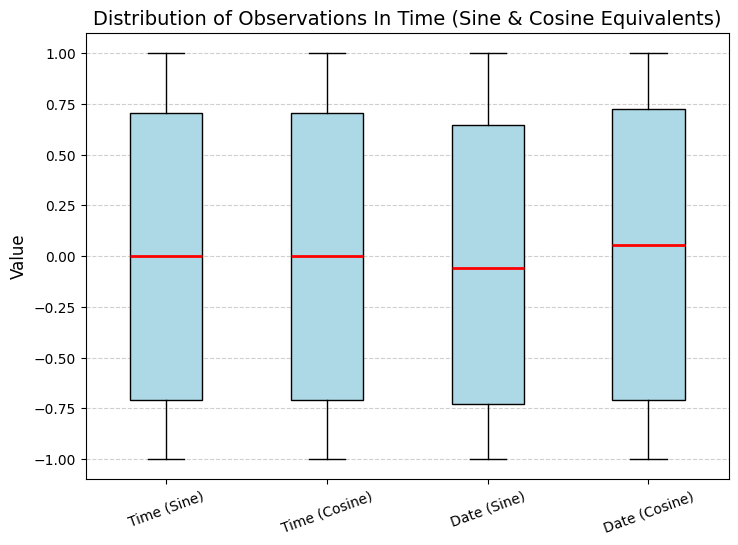

In [ ]:
# Code Block 15a: Combined box plot for sine and cosine variables

import matplotlib.pyplot as plt

fig_width = 8.3
fig_height = 5.8

trig_vars = ['Time_Sin', 'Time_Cos', 'Date_Sin', 'Date_Cos']
trig_data = [df_agg[v].dropna() for v in trig_vars]

plt.figure(figsize=(fig_width, fig_height))
plt.boxplot(
    trig_data,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red', linewidth=2)
)

plt.xticks(range(1, len(trig_vars) + 1), [clean_labels[v] for v in trig_vars], rotation=20)
plt.title("Distribution of Observations In Time (Sine & Cosine Equivalents)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

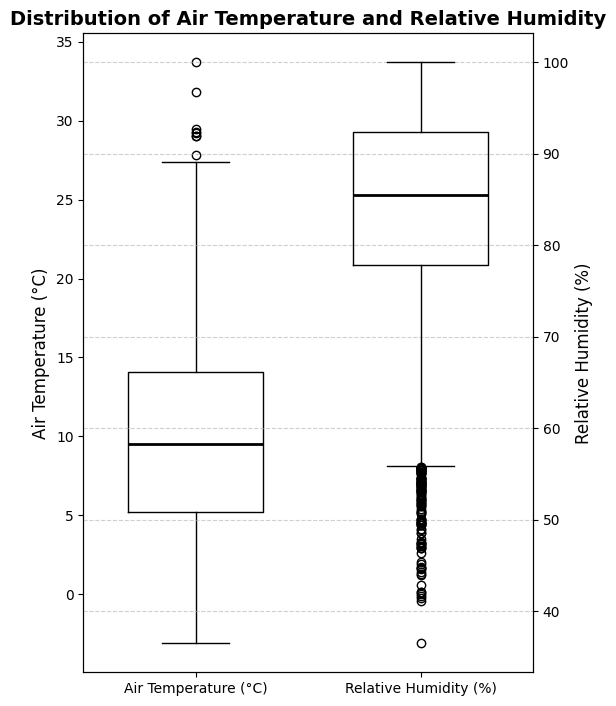

In [ ]:
# Code Block 15b (Restored): Air Temperature + Relative Humidity (dual y-axes)
# Portrait orientation, bold title, no box fill, black axis text.

import matplotlib.pyplot as plt

# A5 portrait dimensions
fig_width = 5.8
fig_height = 8.3

plt.figure(figsize=(fig_width, fig_height))

# Primary axis for Air Temperature
ax1 = plt.gca()
ax1.boxplot(
    df_agg['Air_Temp'].dropna(),
    positions=[1],
    widths=0.6,
    patch_artist=False,          # no fill
    boxprops=dict(color='black'),
    medianprops=dict(color='black', linewidth=2)
)
ax1.set_ylabel(clean_labels['Air_Temp'], fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Secondary axis for Relative Humidity
ax2 = ax1.twinx()
ax2.boxplot(
    df_agg['Relative_Humidity'].dropna(),
    positions=[2],
    widths=0.6,
    patch_artist=False,          # no fill
    boxprops=dict(color='black'),
    medianprops=dict(color='black', linewidth=2)
)
ax2.set_ylabel(clean_labels['Relative_Humidity'], fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# X-axis labels
plt.xticks([1, 2], [clean_labels['Air_Temp'], clean_labels['Relative_Humidity']], rotation=15)

# Bold title
plt.title("Distribution of Air Temperature and Relative Humidity", fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

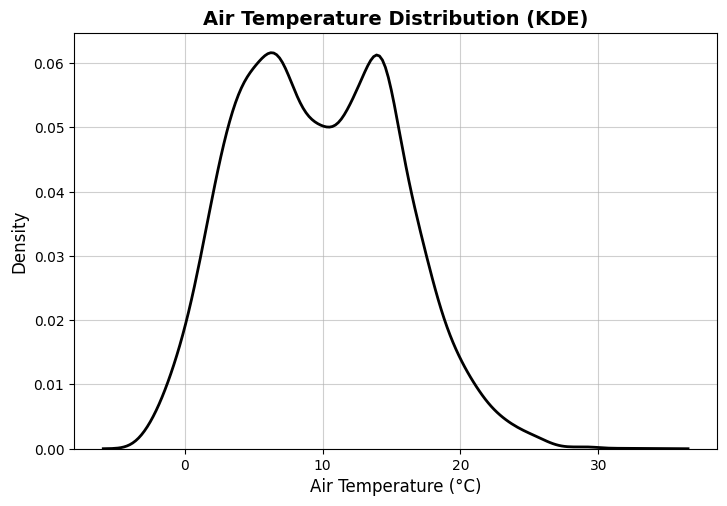

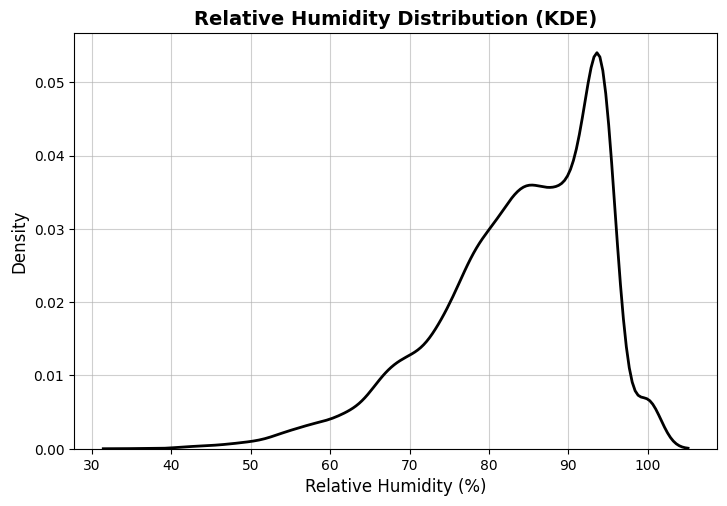

In [ ]:
# Code Block 15b.a: KDE plots for Air Temperature and Relative Humidity
# A5 portrait orientation, clean labels, consistent styling.

import matplotlib.pyplot as plt
import seaborn as sns

fig_width = 8.3
fig_height = 5.4

# --- 1. KDE for Air Temperature ---
plt.figure(figsize=(fig_width, fig_height))

sns.kdeplot(
    df_agg['Air_Temp'].dropna(),
    linewidth=2,
    color='black'
)

plt.xlabel(clean_labels['Air_Temp'], fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Air Temperature Distribution (KDE)", fontsize=14, fontweight='bold')
plt.grid(alpha=0.6)

plt.show()


# --- 2. KDE for Relative Humidity ---
plt.figure(figsize=(fig_width, fig_height))

sns.kdeplot(
    df_agg['Relative_Humidity'].dropna(),
    linewidth=2,
    color='black'
)

plt.xlabel(clean_labels['Relative_Humidity'], fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Relative Humidity Distribution (KDE)", fontsize=14, fontweight='bold')
plt.grid(alpha=0.6)

plt.show()

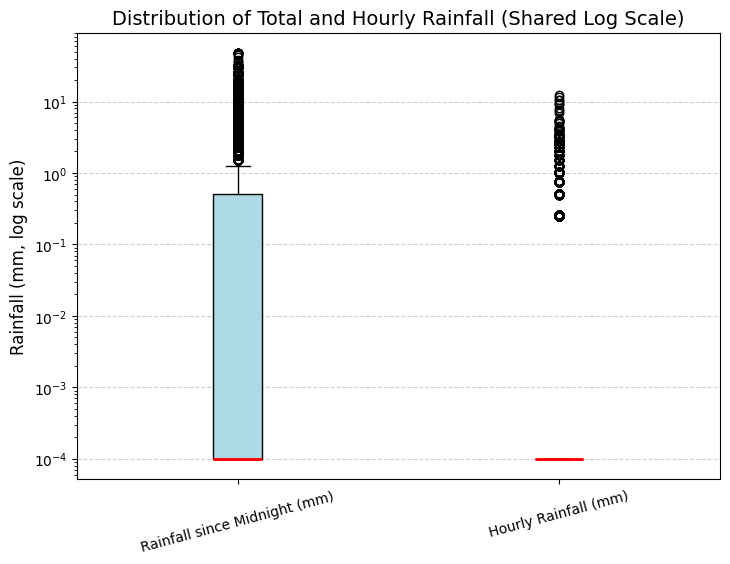

In [ ]:
# Code Block 15c (Updated Again): Combined Total Rainfall + Hourly Rainfall
# on a shared log-scaled y-axis, with data cleaning.

import matplotlib.pyplot as plt
import numpy as np

fig_width = 8.3
fig_height = 5.8

# --- Data cleaning ---
# Replace negative rainfall values with NaN
clean_total = df_agg['Total_Rainfall'].where(df_agg['Total_Rainfall'] >= 0, np.nan)
clean_hourly = df_agg['Hourly_Rainfall'].where(df_agg['Hourly_Rainfall'] >= 0, np.nan)

# Add a small constant to avoid log(0)
eps = 0.0001
clean_total = clean_total + eps
clean_hourly = clean_hourly + eps

# --- Plotting ---
plt.figure(figsize=(fig_width, fig_height))

plt.boxplot(
    [clean_total.dropna(), clean_hourly.dropna()],
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red', linewidth=2)
)

plt.yscale('log')
plt.ylabel("Rainfall (mm, log scale)", fontsize=12)
plt.xticks(
    [1, 2],
    [clean_labels['Total_Rainfall'], clean_labels['Hourly_Rainfall']],
    rotation=15
)

plt.title("Distribution of Total and Hourly Rainfall (Shared Log Scale)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

KDE Estimates of Rainfall Variables

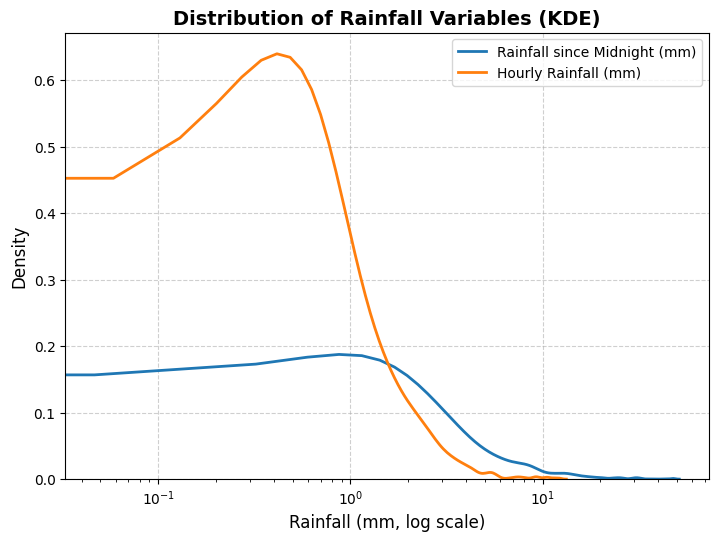

In [ ]:
# Code Block 15d (Updated): Kernel density estimates for rainfall variables (log-scaled)
# Filters out rainfall values < 0.01 mm (instrument resolution)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig_width = 8.3
fig_height = 5.8

# --- Data cleaning ---
# Remove negative values
clean_total = df_agg['Total_Rainfall'].where(df_agg['Total_Rainfall'] >= 0, np.nan)
clean_hourly = df_agg['Hourly_Rainfall'].where(df_agg['Hourly_Rainfall'] >= 0, np.nan)

# Apply minimum resolution threshold
clean_total = clean_total.where(clean_total >= 0.01, np.nan)
clean_hourly = clean_hourly.where(clean_hourly >= 0.01, np.nan)

# Add small constant to avoid log(0)
eps = 0.001
clean_total = clean_total + eps
clean_hourly = clean_hourly + eps

# --- KDE Plot ---
plt.figure(figsize=(fig_width, fig_height))

sns.kdeplot(clean_total.dropna(), label=clean_labels['Total_Rainfall'], linewidth=2)
sns.kdeplot(clean_hourly.dropna(), label=clean_labels['Hourly_Rainfall'], linewidth=2)

plt.xscale('log')
plt.xlabel("Rainfall (mm, log scale)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Rainfall Variables (KDE)", fontsize=14, fontweight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend()

plt.show()

KDE Estimates of Rainfall Variables Split By Rockfall_Occurrence

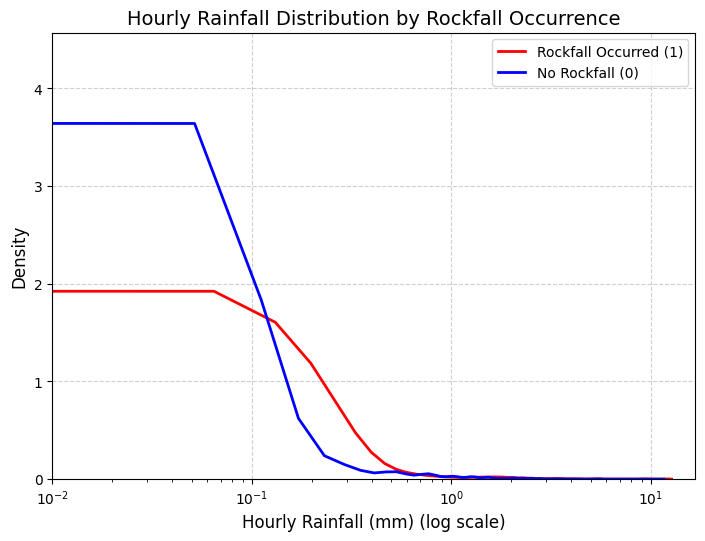

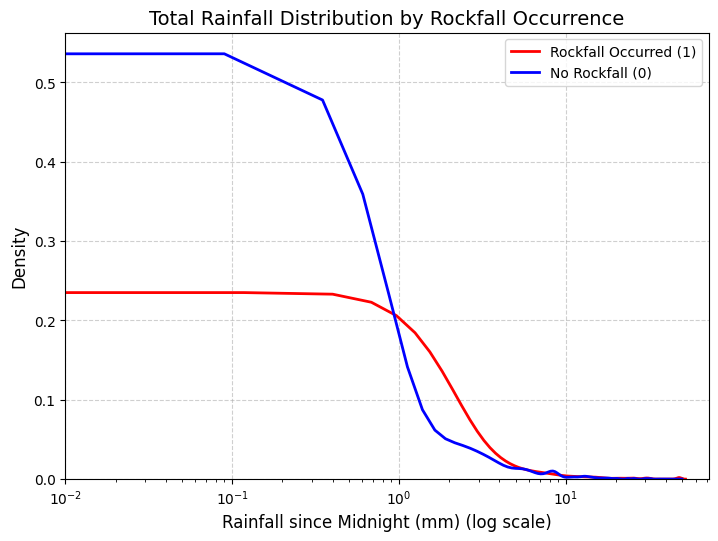

In [ ]:
# Code Block 15e: KDE plots for rainfall variables split by Rockfall_Occurrence

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig_width = 8.3
fig_height = 5.8

# --- Data cleaning ---
# Remove negative rainfall values
clean_total = df_agg['Total_Rainfall'].where(df_agg['Total_Rainfall'] >= 0, np.nan)
clean_hourly = df_agg['Hourly_Rainfall'].where(df_agg['Hourly_Rainfall'] >= 0, np.nan)

# Add small constant to avoid log(0)
eps = 0.001
clean_total = clean_total + eps
clean_hourly = clean_hourly + eps

# Add cleaned variables back into a temporary frame for easy filtering
df_temp = df_agg.copy()
df_temp['clean_total'] = clean_total
df_temp['clean_hourly'] = clean_hourly

# --- 1. KDE for Hourly Rainfall ---
plt.figure(figsize=(fig_width, fig_height))

sns.kdeplot(
    df_temp.loc[df_temp['Rockfall_Occurrence'] == 1, 'clean_hourly'].dropna(),
    label="Rockfall Occurred (1)",
    linewidth=2,
    color='red'
)
sns.kdeplot(
    df_temp.loc[df_temp['Rockfall_Occurrence'] == 0, 'clean_hourly'].dropna(),
    label="No Rockfall (0)",
    linewidth=2,
    color='blue'
)

plt.xscale('log')
plt.xlim(0.01, None)
plt.xlabel(clean_labels['Hourly_Rainfall'] + " (log scale)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Hourly Rainfall Distribution by Rockfall Occurrence", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend()

plt.show()


# --- 2. KDE for Total Rainfall ---
plt.figure(figsize=(fig_width, fig_height))

sns.kdeplot(
    df_temp.loc[df_temp['Rockfall_Occurrence'] == 1, 'clean_total'].dropna(),
    label="Rockfall Occurred (1)",
    linewidth=2,
    color='red'
)
sns.kdeplot(
    df_temp.loc[df_temp['Rockfall_Occurrence'] == 0, 'clean_total'].dropna(),
    label="No Rockfall (0)",
    linewidth=2,
    color='blue'
)

plt.xscale('log')
plt.xlim(0.01, None)
plt.xlabel(clean_labels['Total_Rainfall'] + " (log scale)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Total Rainfall Distribution by Rockfall Occurrence", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend()

plt.show()

# Logistic Regression Modelling

This code looks at regression modelling Hourly_Precipitation, Total_Precipitation (since midnight), Temperature, Humidity with Rockfall Occurrence (binary indicator that a rockfall occurred within a specified hour). The plots use the aggregated dataset (i.e. the data where each observation represents a single hour in the timeperiod, rather than a single rockfall).

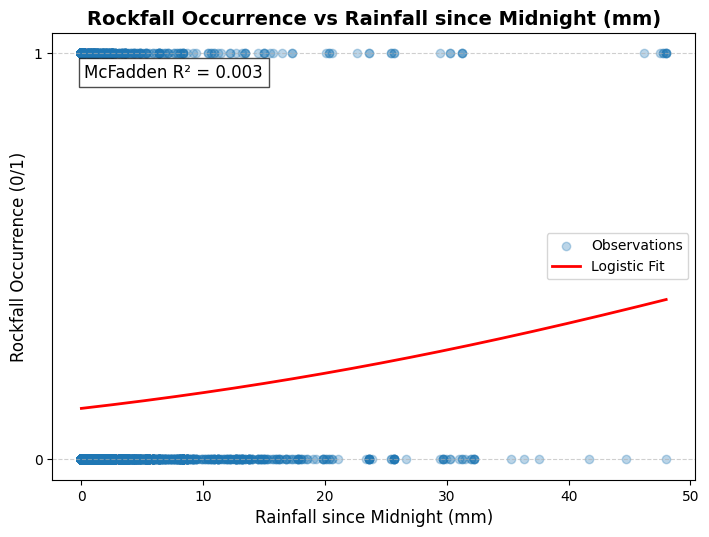

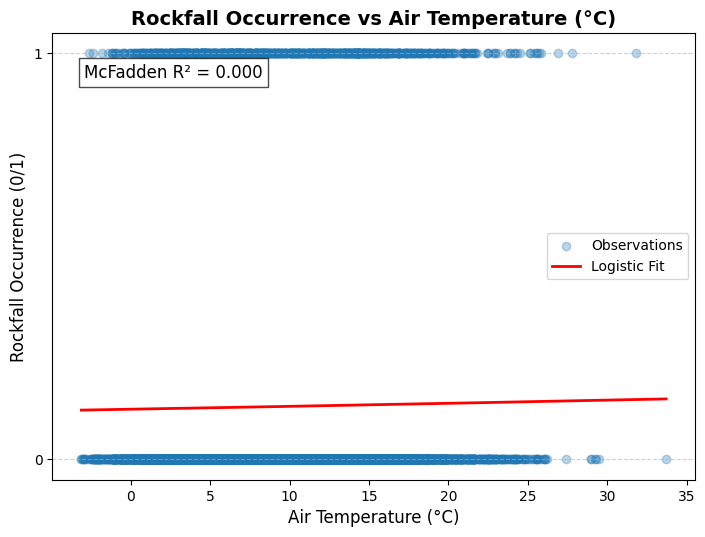

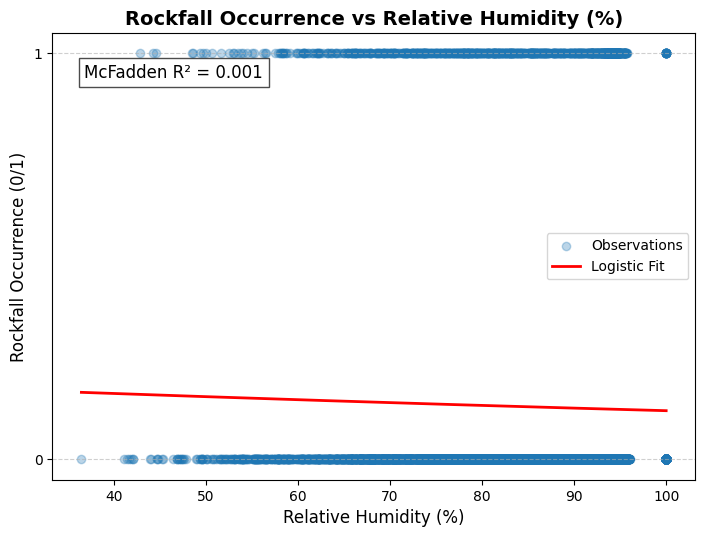

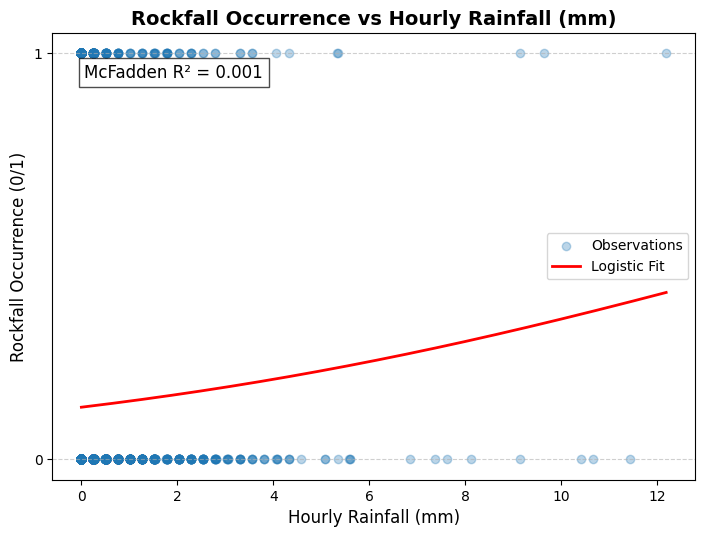

In [ ]:
# Code Block 16: Logistic regression plots for each input variable
# Updated to:
# - Skip sine/cosine date/time variables
# - Set y-axis ticks/gridlines to [0, 1]
# - Keep rainfall variables untransformed
# - Display McFadden pseudo-R² on each plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

fig_width = 8.3
fig_height = 5.8

def log_likelihood(y, p):
    """Compute log-likelihood for binary outcomes."""
    eps = 1e-9
    p = np.clip(p, eps, 1 - eps)
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# Loop through each input variable
for var in input_vars:

    # Skip sine/cosine cyclic encodings
    if "sin" in var.lower() or "cos" in var.lower():
        continue

    # Extract x and y
    x = df_agg[var].copy()
    y = df_agg['Rockfall_Occurrence'].copy()

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid].values.reshape(-1, 1)
    y_clean = y[valid].values

    # Fit logistic regression
    model = LogisticRegression()
    model.fit(x_clean, y_clean)

    # Predicted probabilities for fitted model
    p_model = model.predict_proba(x_clean)[:, 1]

    # Null model (intercept only)
    p_null = np.full_like(y_clean, y_clean.mean(), dtype=float)

    # Compute McFadden pseudo-R²
    ll_model = log_likelihood(y_clean, p_model)
    ll_null = log_likelihood(y_clean, p_null)
    r2_mcfadden = 1 - (ll_model / ll_null)

    # Generate smooth curve for plotting
    x_range = np.linspace(x_clean.min(), x_clean.max(), 300).reshape(-1, 1)
    y_pred = model.predict_proba(x_range)[:, 1]

    # Plot
    plt.figure(figsize=(fig_width, fig_height))

    # Scatter points
    plt.scatter(x_clean, y_clean, alpha=0.3, label="Observations")

    # Logistic curve
    plt.plot(x_range, y_pred, color='red', linewidth=2, label="Logistic Fit")

    # Labels
    plt.xlabel(clean_labels[var], fontsize=12)
    plt.ylabel("Rockfall Occurrence (0/1)", fontsize=12)
    plt.title(f"Rockfall Occurrence vs {clean_labels[var]}", fontsize=14, fontweight= 'bold')

    # Y-axis ticks and gridlines
    plt.yticks([0, 1])
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Display R² on the plot
    plt.text(
        0.05, 0.9,
        f"McFadden R² = {r2_mcfadden:.3f}",
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
    )

    plt.legend()
    plt.show()

I'll be honest, these plots are horrendous... they display such low R2 values, indicating the challenge of dictating rockfall occurrence from continuous variables

#Scatter Plots of Input Variables against Total Rockfall Volume (Per Hour)

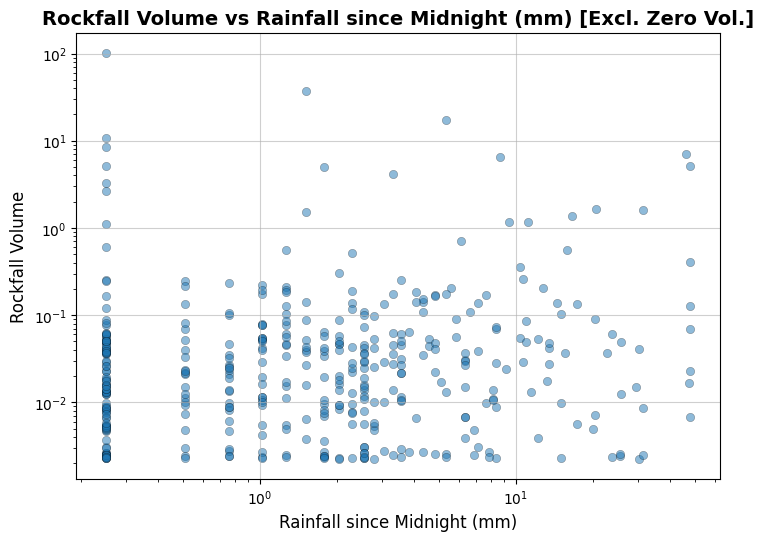

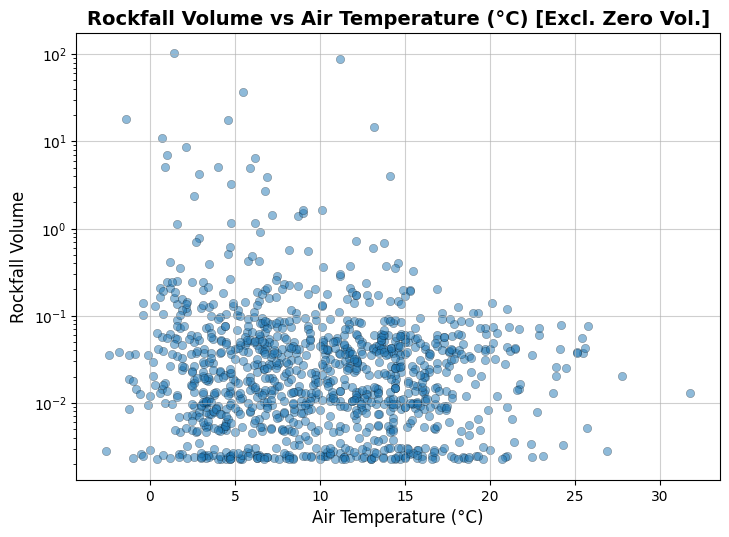

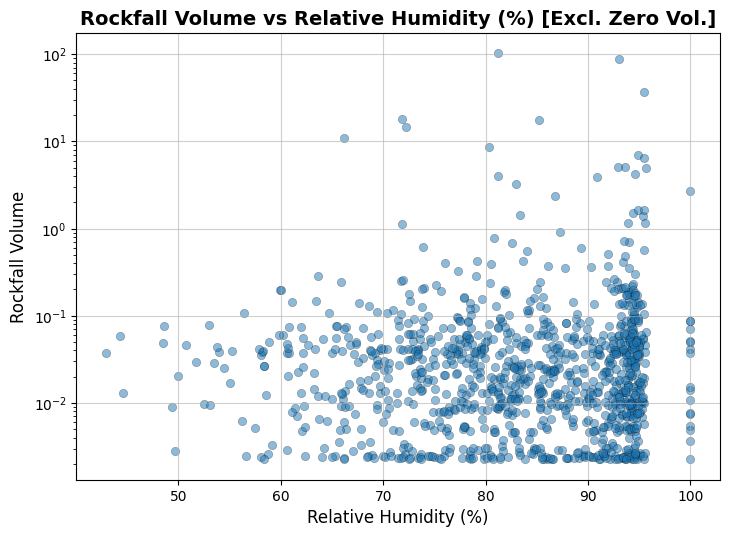

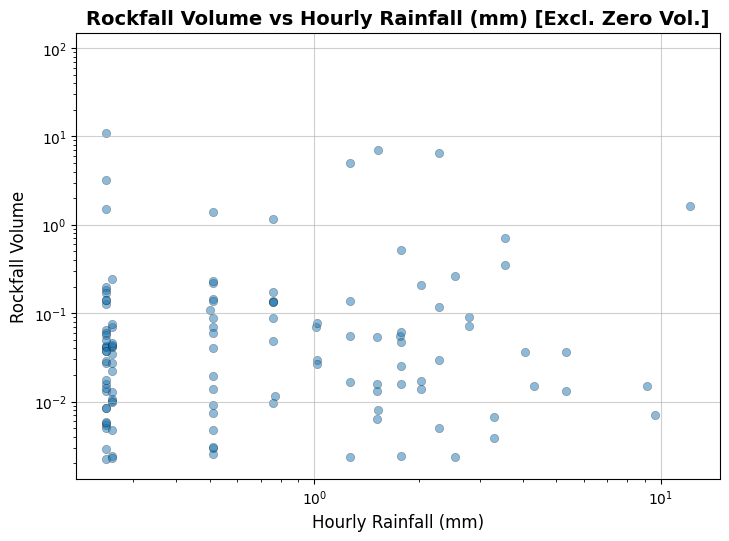

In [ ]:
# Code Block 17: Scatter plots of Rockfall_Volume vs each input variable
# Updates:
# - Skip sine/cosine date/time variables
# - Only non-zero rockfall volumes
# - Logarithmic y-axis
# - Logarithmic x-axis for rainfall variables only

import matplotlib.pyplot as plt
import numpy as np

fig_width = 8.3
fig_height = 5.8

# Filter dataset to only non-zero rockfall volumes
df_nonzero = df_agg[df_agg['Rockfall_Volume'] > 0]

for var in input_vars:

    # Skip sine/cosine cyclic variables
    if "sin" in var.lower() or "cos" in var.lower():
        continue

    x = df_nonzero[var]
    y = df_nonzero['Rockfall_Volume']

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid]
    y_clean = y[valid]

    # Create scatter plot
    plt.figure(figsize=(fig_width, fig_height))
    plt.scatter(x_clean, y_clean, alpha=0.5, edgecolor='k', linewidth=0.3)

    # Log-scale x-axis for rainfall variables
    if var in ['Hourly_Rainfall', 'Total_Rainfall']:
        plt.xscale('log')

    # Labels and title
    plt.xlabel(clean_labels[var], fontsize=12)
    plt.ylabel("Rockfall Volume", fontsize=12)
    plt.yscale('log')

    plt.title(f"Rockfall Volume vs {clean_labels[var]} [Excl. Zero Vol.]", fontsize=14, fontweight= 'bold')
    plt.grid(alpha=0.6)
    plt.show()

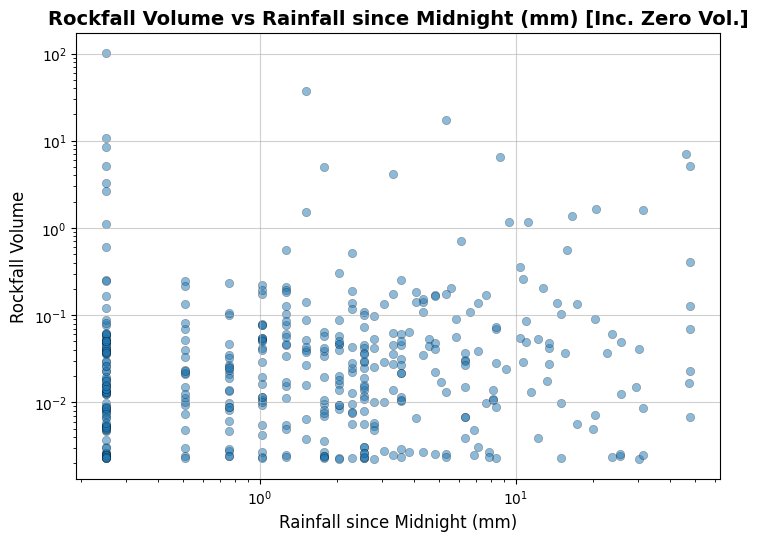

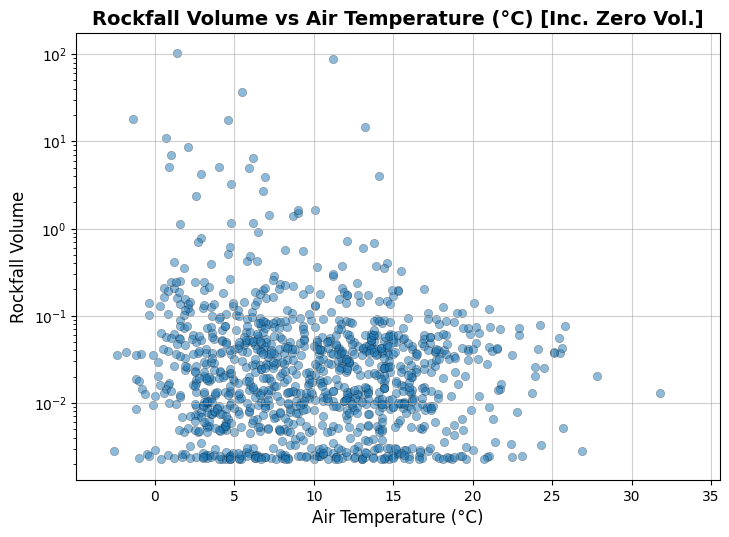

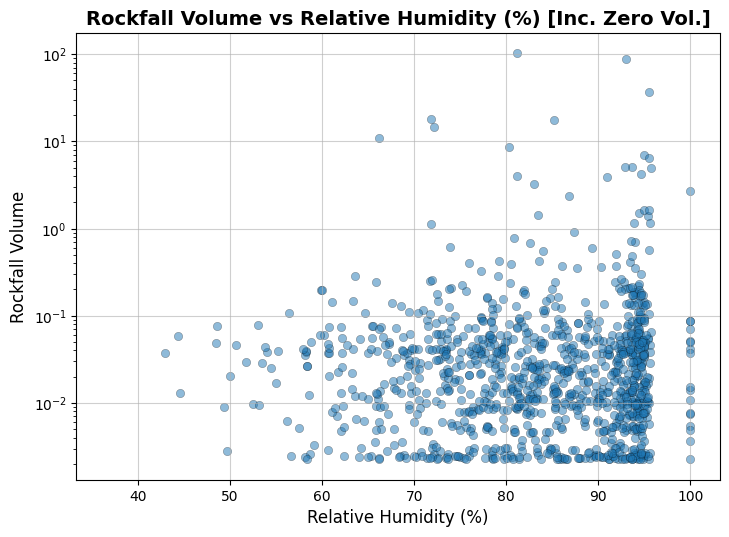

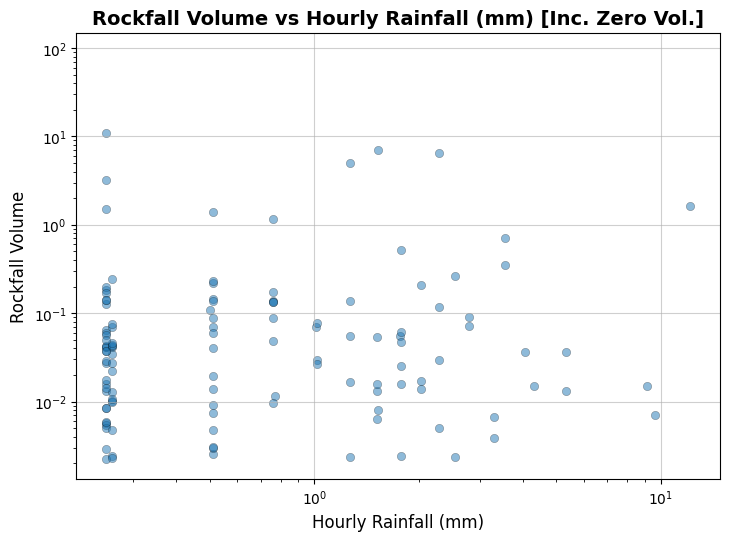

In [ ]:
# Code Block 17b: Scatter plots of Rockfall_Volume vs each input variable
# Differences from Code Block 17:
# - Zero rockfall volumes ARE included
# - Still skips sine/cosine variables
# - Log-y axis
# - Log-x axis for rainfall variables only

import matplotlib.pyplot as plt
import numpy as np

fig_width = 8.3
fig_height = 5.8

# Use full dataset (including zero volumes)
df_all = df_agg.copy()

for var in input_vars:

    # Skip sine/cosine cyclic variables
    if "sin" in var.lower() or "cos" in var.lower():
        continue

    x = df_all[var]
    y = df_all['Rockfall_Volume']

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid]
    y_clean = y[valid]

    # Create scatter plot
    plt.figure(figsize=(fig_width, fig_height))
    plt.scatter(x_clean, y_clean, alpha=0.5, edgecolor='k', linewidth=0.3)

    # Log-scale x-axis for rainfall variables
    if var in ['Hourly_Rainfall', 'Total_Rainfall']:
        plt.xscale('log')

    # Labels and title
    plt.xlabel(clean_labels[var], fontsize=12)
    plt.ylabel("Rockfall Volume", fontsize=12)
    plt.yscale('log')

    plt.title(f"Rockfall Volume vs {clean_labels[var]} [Inc. Zero Vol.]", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.6)
    plt.show()

Notes:
There are negatives in the hourly rockfall dataset which is unphysical. The volumes and rainfall da